In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [147]:
data = pd.read_csv("final_data.csv")
data["Date"] = pd.to_datetime(data["Date"]).dt.date

In [148]:
# get historical market data
hist = yf.download("HDFCBANK.NS", str(data["Date"].iloc[-1]), str(data["Date"].iloc[0]))[["Adj Close"]].reset_index()

[*********************100%%**********************]  1 of 1 completed


In [149]:
hist["Date"] = pd.to_datetime(hist["Date"]).dt.date

In [150]:
merged_data = data.merge(hist, how="right")

In [151]:
merged_data = merged_data.bfill()
merged_data

,Date,link,text,len,sentiment,Adj Close
0,2016-11-23,https://www.moneycontrol.com/news/business/mar...,Moneycontrol Bureau12:58 pm Market Update: The...,428.0,0.286257,564.223206
1,2016-11-24,https://www.moneycontrol.com/news/business/mar...,Moneycontrol Bureau\n\nSpectacular rally on Fr...,507.0,0.677019,555.055664
2,2016-11-25,https://www.moneycontrol.com/news/business/mar...,Moneycontrol Bureau\n\nSpectacular rally on Fr...,507.0,0.677019,566.390076
3,2016-11-25,https://www.moneycontrol.com/news/business/mar...,Moneycontrol Bureau9:55 am Market check: The S...,647.0,-0.571823,566.390076
4,2016-11-28,https://www.moneycontrol.com/news/business/mar...,Moneycontrol Bureau10:59 am Market Update: The...,575.0,-0.749472,564.080322
...,...,...,...,...,...,...
1917,2023-09-26,https://www.moneycontrol.com/news/business/hdf...,HDFC Bank Shares Have Trailed Private Lenders ...,364.0,-0.999903,1537.650024
1918,2023-09-27,https://www.moneycontrol.com/news/business/hdf...,HDFC Bank Shares Have Trailed Private Lenders ...,364.0,-0.999903,1526.849976
1919,2023-09-28,https://www.moneycontrol.com/news/business/hdf...,HDFC Bank Shares Have Trailed Private Lenders ...,364.0,-0.999903,1523.699951
1920,2023-09-29,https://www.moneycontrol.com/news/business/hdf...,HDFC Bank Shares Have Trailed Private Lenders ...,364.0,-0.999903,1526.300049


In [152]:
merged_data[["Adj Close", "sentiment"]].corr()

,Adj Close,sentiment
Adj Close,1.00000,0.08704
sentiment,0.08704,1.00000


In [153]:
import pandas as pd
import numpy as np

correlations = {}
for lag in range(-10, 11):  # Adjust range as needed
    shifted_df = merged_data.copy()
    shifted_df['sentiment'] = shifted_df['sentiment'].shift(lag)
    correlations[lag] = shifted_df['Adj Close'].corr(shifted_df['sentiment'])

# Find the lag with the highest correlation
best_lag = max(correlations, key=correlations.get)
print(f"Best lag: {best_lag} with correlation: {correlations[best_lag]}")


Best lag: 10 with correlation: 0.10425819916060575


In [154]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [157]:
# Assuming df is a DataFrame with two columns: 'sentiment' and 'stock_price'
# Both columns should be time series data.

max_lags = 5  # Define the maximum number of lags you want to test
test = 'ssr_chi2test'  # Test type, can be 'ssr_chi2test', 'ssr_ftest', 'lrtest', 'params_ftest'

gc_results = grangercausalitytests(merged_data[['Adj Close', 'sentiment']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5650  , p=0.4524  , df_denom=1918, df_num=1
ssr based chi2 test:   chi2=0.5659  , p=0.4519  , df=1
likelihood ratio test: chi2=0.5658  , p=0.4519  , df=1
parameter F test:         F=0.5650  , p=0.4524  , df_denom=1918, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1170  , p=0.3275  , df_denom=1915, df_num=2
ssr based chi2 test:   chi2=2.2397  , p=0.3263  , df=2
likelihood ratio test: chi2=2.2384  , p=0.3265  , df=2
parameter F test:         F=1.1170  , p=0.3275  , df_denom=1915, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8752  , p=0.4532  , df_denom=1912, df_num=3
ssr based chi2 test:   chi2=2.6352  , p=0.4513  , df=3
likelihood ratio test: chi2=2.6334  , p=0.4517  , df=3
parameter F test:         F=0.8752  , p=0.4532  , df_denom=1912, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6906  , p=0.

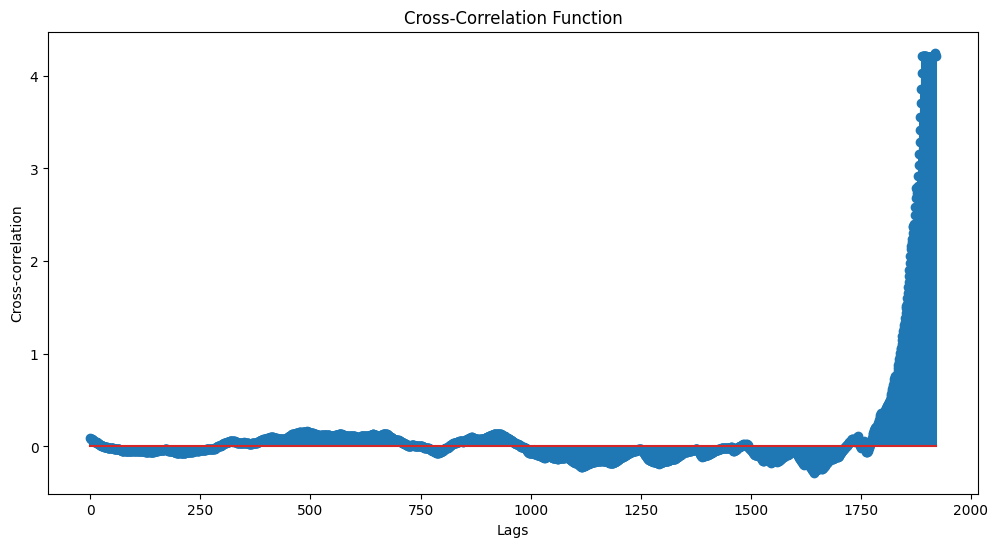

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# Assuming df is your DataFrame with 'sentiment' and 'stock_price' columns

# Compute the cross-correlation function
ccf_values = ccf(merged_data['sentiment'], merged_data['Adj Close'])

# Define the lags
lags = np.arange(len(ccf_values))

# Plot the CCF
plt.figure(figsize=(12, 6))
plt.stem(lags, ccf_values)
plt.xlabel('Lags')
plt.ylabel('Cross-correlation')
plt.title('Cross-Correlation Function')
plt.show()


In [159]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

In [160]:

# Define your target and exogenous variable
y = merged_data['Adj Close']
exog = merged_data[['sentiment']]  # Exogenous variable



In [161]:
# Train/Test Split
n = len(merged_data)
train_size = int(n * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
exog_train, exog_test = exog[:train_size], exog[train_size:]



In [162]:
model = sm.tsa.statespace.SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 200), exog=exog_train)
# Fit the model
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.91266D+00    |proj g|=  7.68048D-02


 This problem is unconstrained.


In [129]:
# Make predictions
predictions = results.predict(start=train_size, end=n-1, exog=exog_test)

# Evaluate the model
mse = mean_absolute_percentage_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"MAPE: {rmse}")

MAPE: 0.300944688170262
